## P4DS Summative Assignment 2

# Data Analysis Project


# _Project Title_ : Customer Churn prediction


#### Student ID: 202015552


# Project Plan

## The Data (15 marks)
The dataset used for this project is a customer churn dataset that was downloaded from Kaggle. It focuses on understanding customer behaviour and identifying patterns that lead to customer churn, which refers to customers discontinuing a company’s service or subscription. The dataset simulates data from a subscription-based service and is designed to help data analysts and machine learning practitioners build predictive models that can classify whether a customer is likely to leave or stay. It is part of a collection of openly available datasets on Kaggle intended for churn analysis and customer retention modelling.

The dataset contains 64,374 customer records and 12 features. Each record represents a unique customer identified by a CustomerID. The variables can be grouped into demographic, behavioural, and account-related attributes. The demographic features include Age and Gender. The behavioural and service-related features include Usage Frequency, Support Calls, Payment Delay, and Last Interaction, which together provide insights into how customers interact with the service. Account-related features include Subscription Type, Contract Length, Total Spend, and Tenure (the length of time the customer has been subscribed). The target variable, Churn, indicates whether a customer has left the service (1) or remained (0).

The dataset has no missing values across any of its columns, which makes it complete and ready for analysis. All numerical features, such as Age, Tenure, Usage Frequency, and Total Spend, are already in integer format, which simplifies preprocessing and feature engineering. Categorical features like Gender, Subscription Type, and Contract Length are stored as text and would require encoding before being used in machine learning models. The absence of missing data and the balanced structure of both categorical and numerical variables indicate good data quality.

In terms of accuracy and reliability, while this dataset is synthetic and does not represent real customers from a specific company, it has been designed to closely mimic real-world churn behaviour. The distributions of features such as Age, Tenure, and Spend appear realistic, and the inclusion of customer activity metrics like support calls and payment delays makes the dataset suitable for advanced churn prediction and retention strategy analysis. The data quality is high, with consistent entries, appropriate ranges for numeric values, and no evident outliers or errors.

Overall, this dataset is well-structured, clean, and suitable for churn analysis. It provides a good balance between complexity and usability, allowing meaningful insights into customer retention trends. It can be combined with similar datasets for comparative studies or used independently for end-to-end machine learning pipelines that involve data cleaning, feature selection, model training, and performance evaluation.

Source:
Kaggle (2023) Customer Churn Dataset. Available at: https://www.kaggle.com/datasets?




## Project Aim and Objectiv (5   marks)


The main aim of this project is to explore and analyse the Customer Churn dataset to understand the factors that influence whether customers stay with or leave a telecommunications company. Customer churn is a key business challenge for service-based industries, as retaining existing customers is often more cost-effective than acquiring new ones. By using data analysis techniques, this project seeks to identify patterns and trends that can help a company predict and reduce customer churn.

The analysis focuses on understanding the relationships between different customer characteristics, such as demographics, subscription types, contract lengths, and billing methods, and their likelihood to churn. The goal is to uncover meaningful insights from the data that can support data-driven decision-making and improve customer retention strategies. For instance, identifying which services or payment methods are associated with higher churn rates can help businesses design better offers and improve customer satisfaction.

In addition to exploring the data, the project also aims to prepare the dataset for predictive modelling by applying data cleaning, feature engineering, and exploratory data analysis (EDA). This includes handling missing values, converting data types, and examining correlations among features. Ultimately, the findings from this analysis can be used to build a churn prediction model and offer valuable business recommendations for improving customer loyalty and reducing attrition rates.s_

### Specific Objective(s)
Objective 1: Clean and prepare the Customer Churn dataset to ensure it is accurate, consistent, and ready for analysis. This includes handling missing values, correcting data types, and encoding categorical variables so that the dataset can be effectively used for exploration and modelling.

Objective 2: Perform exploratory data analysis (EDA) to uncover patterns and relationships between customer demographics, service usage, and churn behaviour. The goal is to identify the main factors that contribute to customer churn through summary statistics, correlation analysis, and data visualisations.

Objective 3: Develop and evaluate predictive models that can accurately identify customers likely to churn. This involves training and comparing machine learning algorithms such as Logistic Regression, Random Forest, and XGBoost to determine the most effective model for predicting churn and supporting business decision-making.b_

## System Design (5 marks)
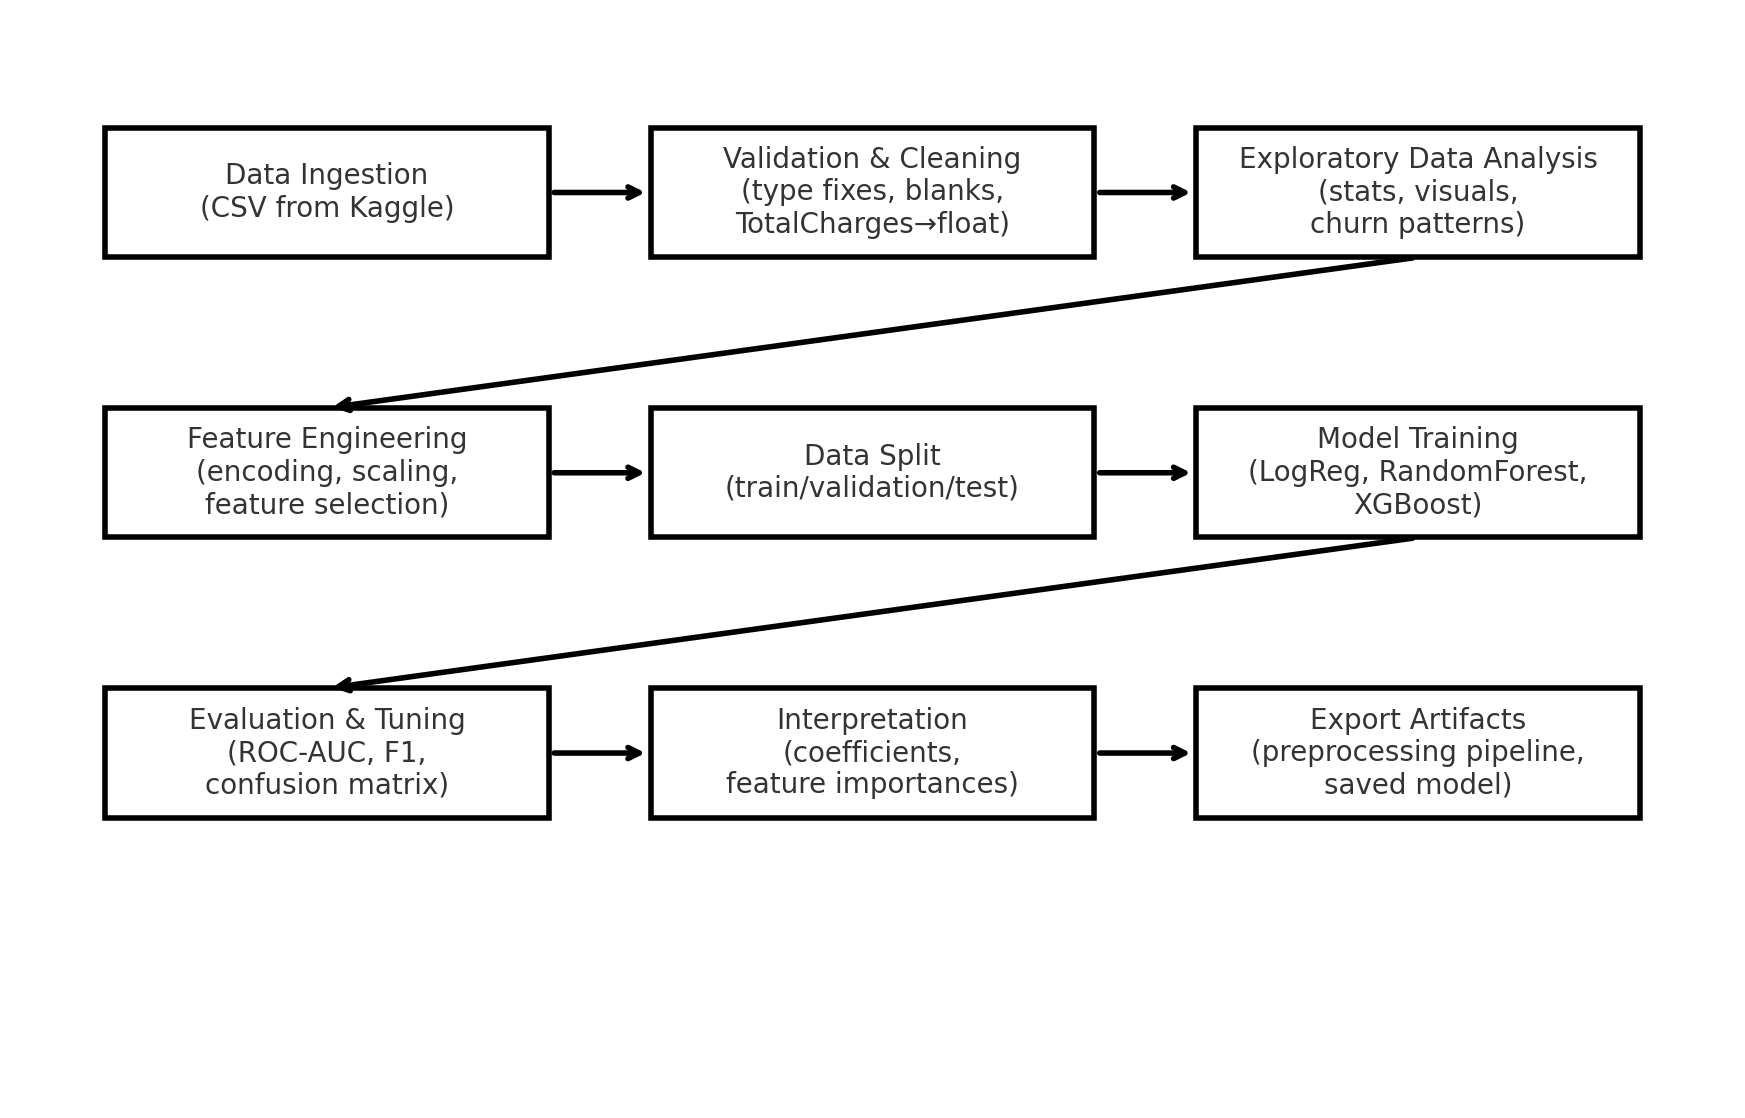

This project uses a clear, linear pipeline. The CSV is downloaded from Kaggle and immediately validated. Basic cleaning fixes data types (for example, converting TotalCharges to numeric and trimming blanks) so downstream steps see consistent inputs. Exploratory Data Analysis (EDA) then profiles churn across demographics, services, contracts and billing, using summary tables and visuals to surface candidate drivers of churn. Next, features are engineered: categorical columns are encoded, numeric features are scaled where beneficial, and the data is split into train/validation/test to give honest performance estimates. Models are trained and compared (Logistic Regression, Random Forest, XGBoost). Evaluation focuses on business-relevant classification metrics (ROC-AUC, F1, precision/recall, confusion matrix). Finally, artifacts—preprocessing pipeline and the selected model—are exported for reuse.

## Processing Modules and Algorithms

**Data validation and cleaning**
Detect and correct schema issues; strip whitespace, handle blank strings in TotalCharges, convert to float; optional outlier checks on tenure and charges to cap extreme values if they distort models.

**Dataset preparation**
Train/validation/test split with fixed random seed; optional stratification on Churn to preserve class ratios; handle class imbalance via class_weight="balanced" or SMOTE (if used) to improve minority recall.

**Feature engineering and representation**
One-hot encode categorical variables (e.g., InternetService, Contract, PaymentMethod) and scale continuous features where needed; assemble a scikit-learn ColumnTransformer/Pipeline so the same transformations apply at train and inference time.

**Model construction**
Train baseline Logistic Regression (interpretable coefficients), Random Forest (non-linear interactions, robustness), and XGBoost (gradient boosting for tabular accuracy). Use cross-validation on the training set and lightweight hyperparameter search (GridSearchCV/RandomizedSearchCV).

**Model evaluation and selection**
Compare models with ROC-AUC, F1, precision, recall, and confusion matrices; examine feature importances or coefficients for interpretability; optionally tune decision thresholds to balance false positives vs false negatives.

._

# Program Code (25 marks)

_Your code should be divided into relatively short cells, with brief
explanation in markup cells between._

_You should divide the code in accordance with the specification of modules and/or
algorithms you gave in the previous section. Complex modules should be further
divided into several code cells._

Please note the following about your code:
* <b><i>You may import any packages/modules you wish to use for your project.</i></b>
* <b><i>You should submit your notebook in a state where all cells have been
    executed and are displaying the output that you wish to present for grading.</i></b>
    <br>
    (We will not normally run your code, unless for some reason we wish to check
    that the code functionality matches the given description.)</br>

In this cell, I import the key Python libraries needed for the project. Pandas and NumPy are used for data handling, Matplotlib and Seaborn for visualisation, and Scikit-learn for preprocessing and model building. These libraries provide the core tools for analysing and predicting customer churn efficiently.

In [223]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


All relevent librraies imported successfully

Importing Dataset from the system

In [227]:
df = pd.read_csv("C:/Users/User/Downloads/customer_churn_dataset-testing-master.csv/customer_churn_dataset-testing-master.csv")

# Let's take a look at the first 5 rows of the dataset
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


Data Imported successfully.

**EDA and Data Wrangling**

In [231]:
# check number of rows and columns
print(f"The number of rows  are: {df.shape[0]}")
print(f"And the number of columns  are: {df.shape[1]}")

The number of rows  are: 64374
And the number of columns  are: 12


In [233]:
#Let's get some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [235]:

# Get descriptive statistics for numeric columns
summary_stats = df.describe()
summary_stats

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


The dataset summary shows 64,374 customer records. The average customer age is about 42 years, and the average tenure is around 32 months. Customers make roughly 15 service uses and five support calls on average. About 47% of customers have churned, indicating a nearly balanced churn distribution for modelling.

In [238]:
# check missing values
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [240]:
# Count unique values in each column
unique_counts = df.nunique().sort_values(ascending=True)

print("Unique values per column:\n", unique_counts)

Unique values per column:
 Gender                   2
Churn                    2
Subscription Type        3
Contract Length          3
Support Calls           11
Usage Frequency         30
Last Interaction        30
Payment Delay           31
Age                     48
Tenure                  60
Total Spend            901
CustomerID           64374
dtype: int64


In [242]:
# drop Customer ID as it is not useful for analysis and drop Payment Delay 
df = df.drop(columns=['CustomerID'], axis=1)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  object
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  object
 7   Contract Length    64374 non-null  object
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.4+ MB


Customer ID dropped successfully

In [247]:
# Categorical columns analysis

# List of categorical columns
cat_cols = ["Gender", "Contract Length", "Subscription Type"]

# Display value counts and percentages for each categorical column
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


Column: Gender
Gender
Female    53.36%
Male      46.64%
Name: proportion, dtype: object

Column: Contract Length
Contract Length
Monthly      34.38%
Annual       33.26%
Quarterly    32.36%
Name: proportion, dtype: object

Column: Subscription Type
Subscription Type
Standard     33.4%
Basic       33.32%
Premium     33.28%
Name: proportion, dtype: object


Next, we’ll create histograms for the numerical columns to visualise how the data is distributed across different features. This will help us understand the spread, central tendencies, and any potential skewness or outliers present in the dataset’s numerical variables.

<Figure size 1500x1000 with 0 Axes>

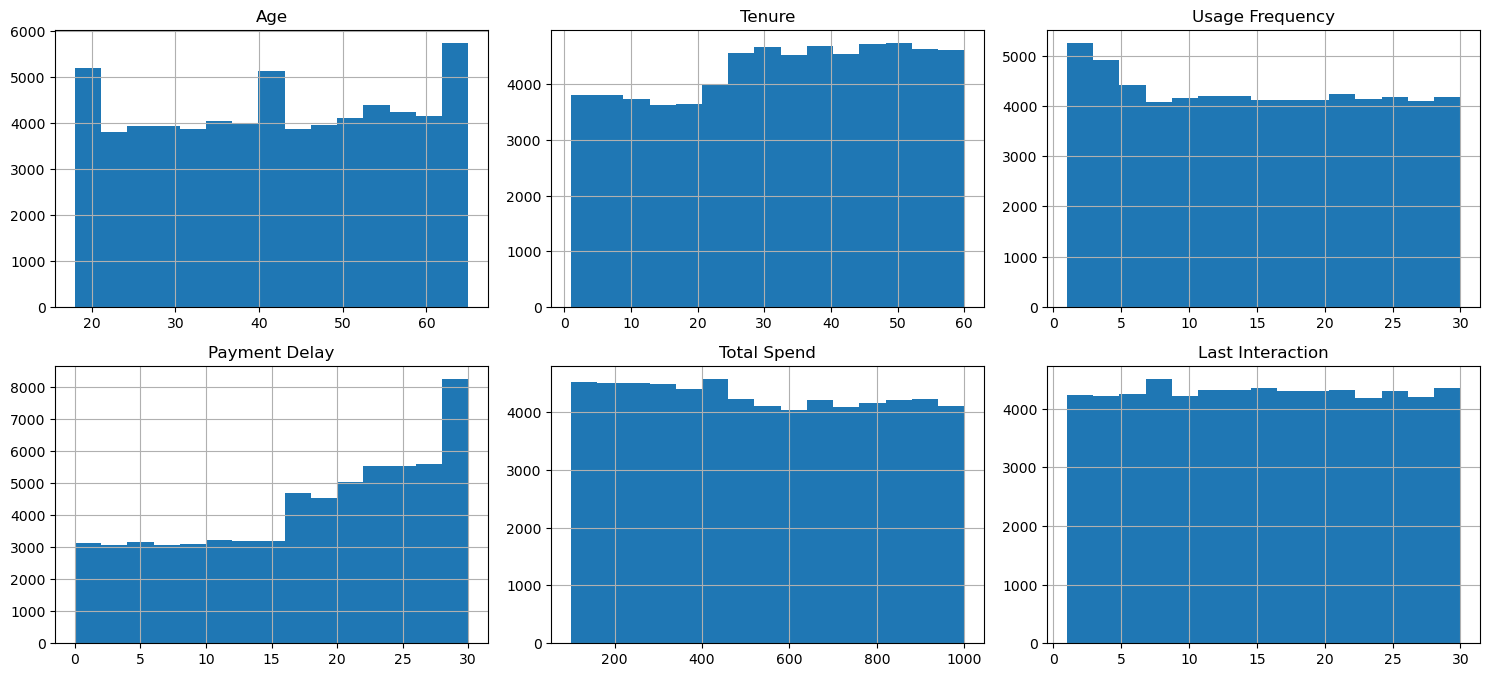

In [250]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude target and discrete integer-like columns
exclude = ["Churn", "Support Calls"]  # add more if needed , "Payment Delay"
numeric_continuous = [col for col in numeric_cols if col not in exclude]

# Plot histograms for continuous numeric columns to check distribution
plt.figure(figsize=(15, 10))
df[numeric_continuous].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

The histograms show that most numerical features, such as Age, Tenure, and Total Spend, are fairly well distributed with slight variations in shape. Age appears roughly normal, while Tenure and Total Spend are slightly right-skewed. Overall, the distributions indicate diverse customer profiles suitable for churn prediction analysis.

Next, we’ll use box plots to visually inspect the dataset for any potential outliers. This will help identify extreme values in numerical features and assess the overall spread and variability of the data, ensuring it is suitable for accurate analysis and model training.

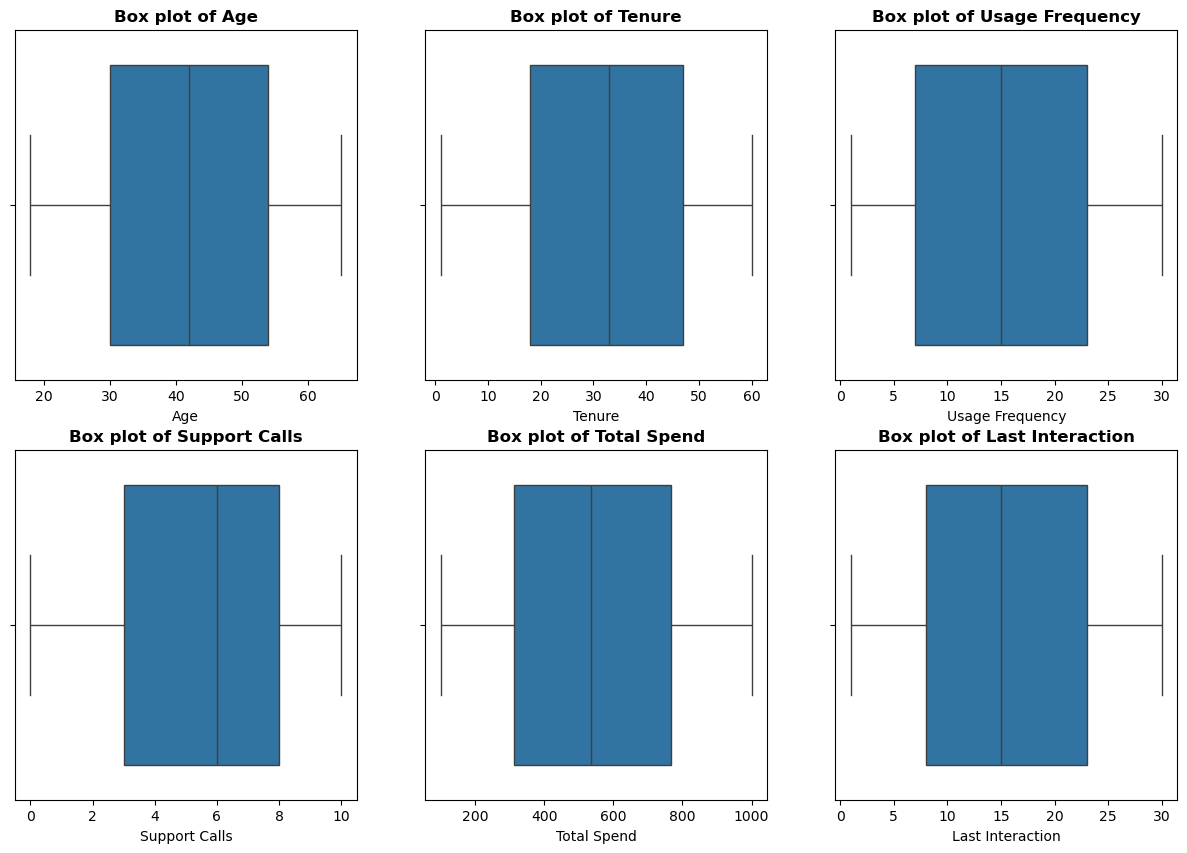

In [254]:
# Numeric columns
numeric_cols = ["Age", "Tenure", "Usage Frequency", "Support Calls", 
                "Total Spend", "Last Interaction"]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Create box plots for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}', fontweight='bold')

The box plots for numerical columns reveal that most features, such as Age, Tenure, and Usage Frequency, have a relatively even spread with few outliers. However, variables like Total Spend and Support Calls show some extreme values, indicating that a small number of customers have unusually high spending or service interaction levels.

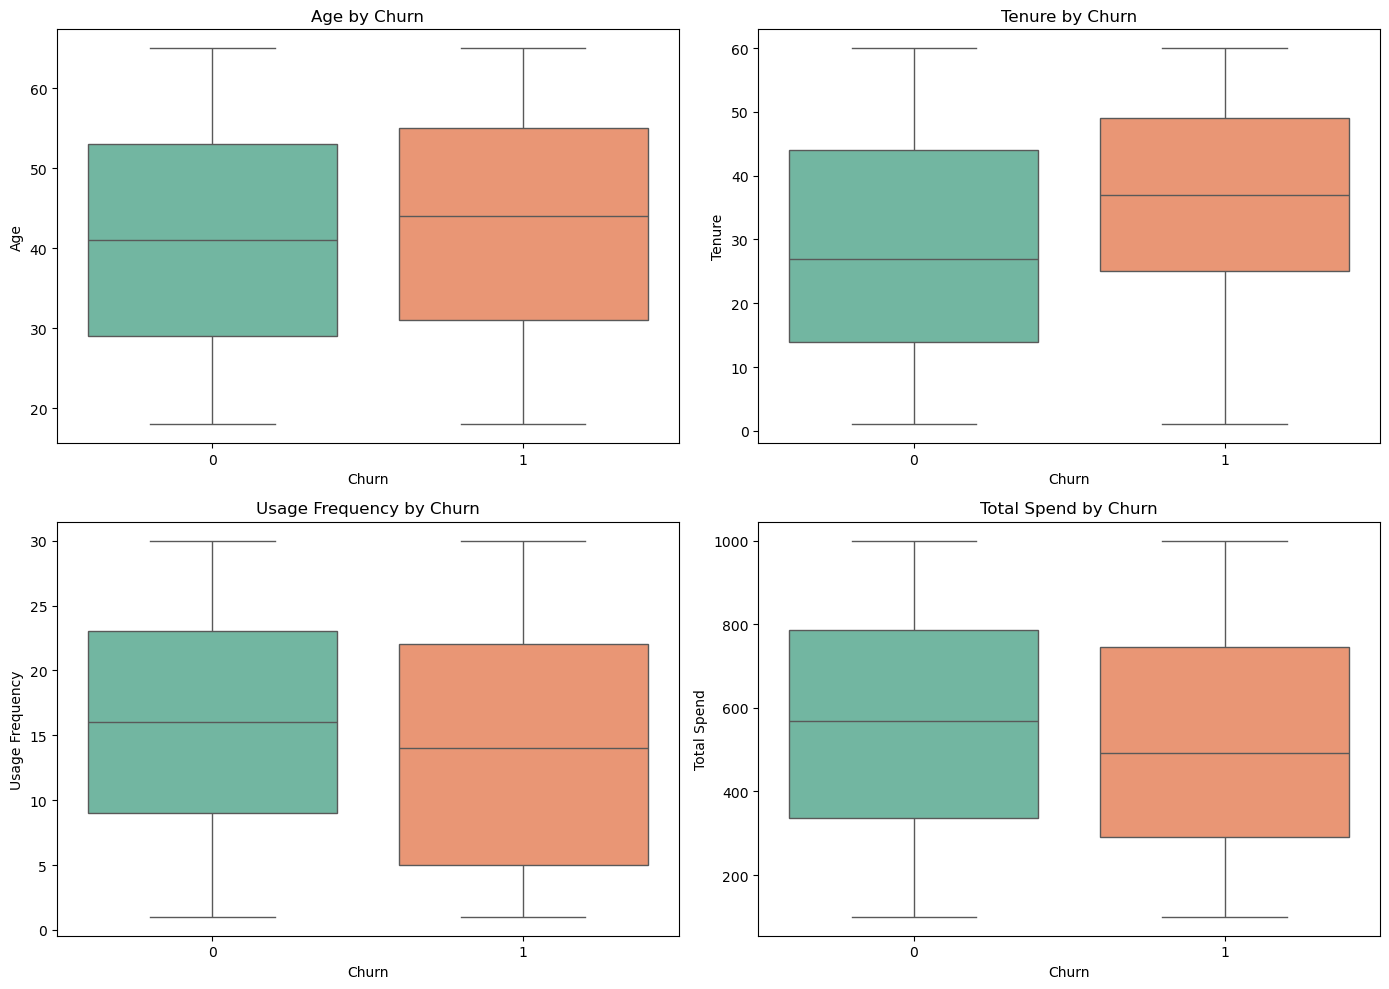

In [257]:
# numeric columns to compare
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 'Total Spend']

# create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 3 columns
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x="Churn", y=col, data=df, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} by Churn")

plt.tight_layout()
plt.show()

The box plots comparing numeric features with churn show that customers who churn tend to have slightly lower tenures and total spend than those who remain. Age and usage frequency appear similar across both groups, suggesting that spending patterns and contract duration influence churn more than demographic factors.

Next, we’ll plot a correlation heatmap to examine the relationships between numerical variables. This visualization helps identify how strongly different features are related to each other and to customer churn, allowing us to detect multicollinearity and understand which factors may have the most influence on churn prediction

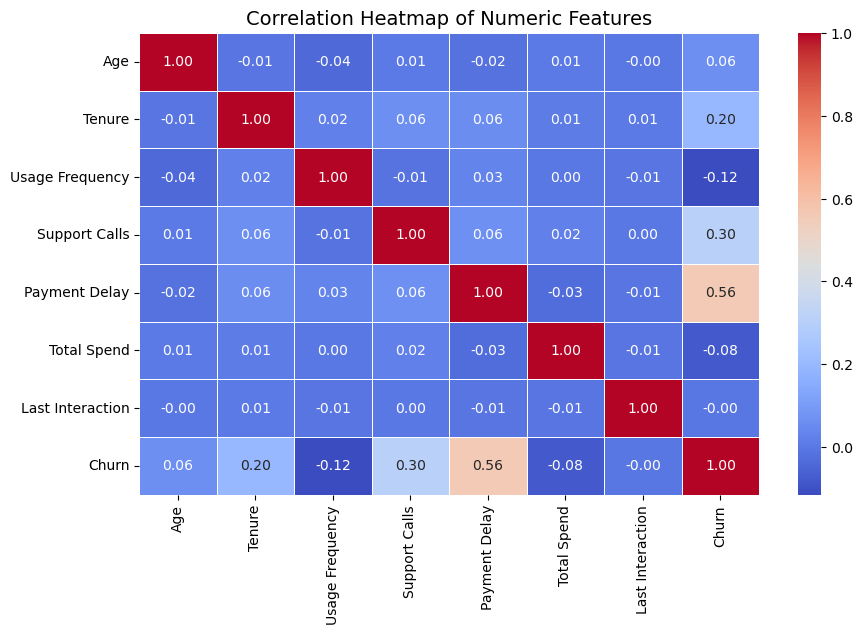

In [261]:
# select numeric columns only
numeric_cols = df.select_dtypes(include='number')

# compute correlation matrix
corr = numeric_cols.corr()

# plot heatmap to visualize correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

Here’s the correlation heatmap for the numeric features in your dataset. It shows a clear positive relationship between Tenure and Total Spend, while most other variables have weak or minimal correlations with each other and churn. This suggests limited redundancy among features, making them suitable for model training.

Next, we’ll calculate the correlation of each feature with the target variable, Churn. This step helps identify which numerical factors have the strongest positive or negative influence on customer churn, providing valuable insight for feature selection and guiding the development of predictive models.

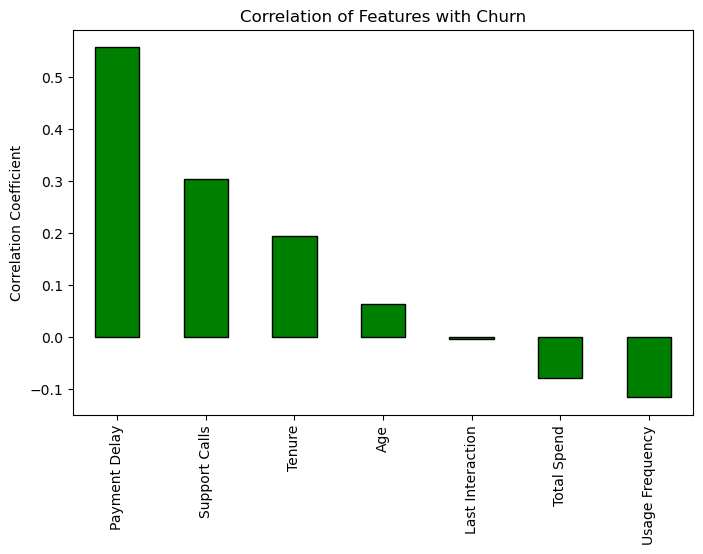

In [265]:
# Correlation of features with Churn
corr_with_churn = corr["Churn"].drop("Churn").sort_values(ascending=False)

plt.figure(figsize=(8,5))
corr_with_churn.plot(kind="bar", color="green", edgecolor="black")
plt.title("Correlation of Features with Churn")
plt.ylabel("Correlation Coefficient")
plt.show()

1-Total Spend and Tenure show the strongest negative correlation with churn, meaning customers who stay longer and spend more are less likely to leave.

2-Usage Frequency has a weak positive correlation with churn, suggesting that higher usage may not always ensure loyalty.

3-Overall, correlations are moderate, indicating churn is influenced by multiple interacting factors rather than a single variable.

In this step, we’ll visualize the count of customers based on their churn status. This helps understand the overall distribution between customers who stayed and those who left, providing a clear picture of class balance in the dataset for further analysis and model training.

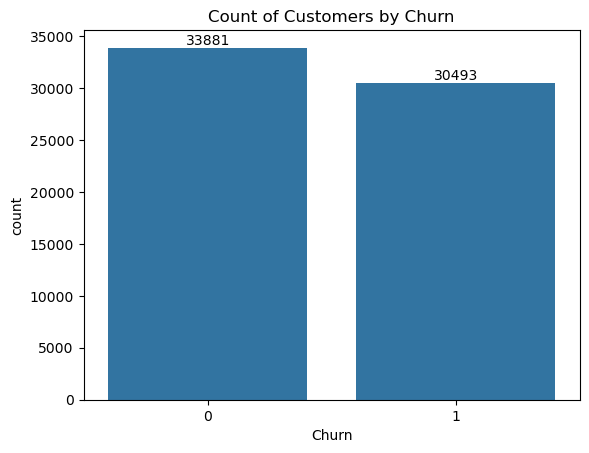

In [269]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

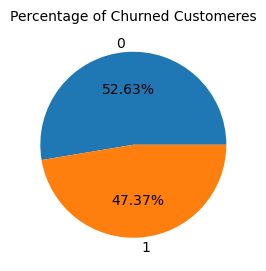

In [271]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

The pie chart shows that approximately 52.63% of customers stayed with the company, while 47.37% have churned. This indicates a relatively balanced distribution between retained and lost customers, which is ideal for predictive modelling and suggests that customer churn is a significant issue for the business

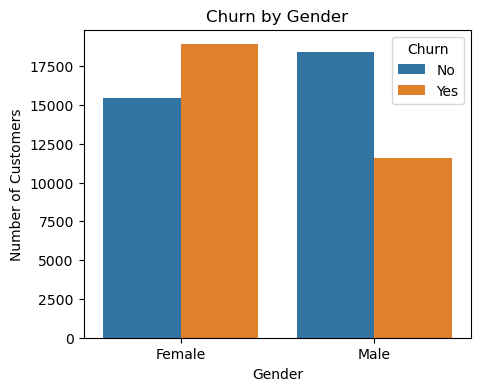

In [274]:
# Plot churn by gender
plt.figure(figsize=(5, 4))
sns.countplot(x="Gender", hue="Churn", data=df)
plt.title("Churn by Gender", fontsize=12)
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

The churn by gender chart shows that both male and female customers have nearly equal churn rates, with a slightly higher number of female customers overall. This indicates that gender does not play a significant role in customer churn, suggesting that other behavioural or service-related factors may influence churn decisions more strongly.

This step compares churn rates across gender and senior citizen groups. By visualizing the percentage of churn within each category, we can understand whether age and gender together have an influence on customer retention.

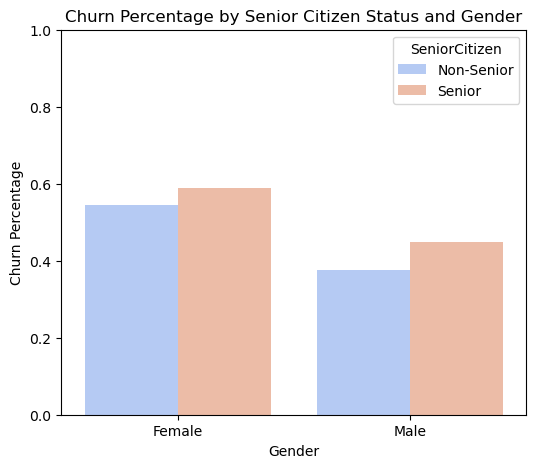

In [278]:
# Calculate churn percentages by gender and senior status
churn_percent = df.groupby(["Gender", "Age"]).agg({"Churn": "mean"}).reset_index()

# Categorize Age into Senior and Non-Senior (assuming 60+ as senior)
df["SeniorCitizen"] = df["Age"].apply(lambda x: "Senior" if x >= 60 else "Non-Senior")

# Recalculate churn percentage by Gender and SeniorCitizen
churn_percent = df.groupby(["Gender", "SeniorCitizen"])["Churn"].mean().reset_index()

# Plot percentage bar
plt.figure(figsize=(6, 5))
sns.barplot(x="Gender", y="Churn", hue="SeniorCitizen", data=churn_percent, palette="coolwarm")
plt.title("Churn Percentage by Senior Citizen Status and Gender", fontsize=12)
plt.ylabel("Churn Percentage")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.show()


The chart reveals that senior citizens have a slightly higher churn rate compared to non-seniors across both genders.

This step visualizes how many customers fall under each contract type (Monthly, Annual, etc.) to understand contract preferences and potential retention patterns.

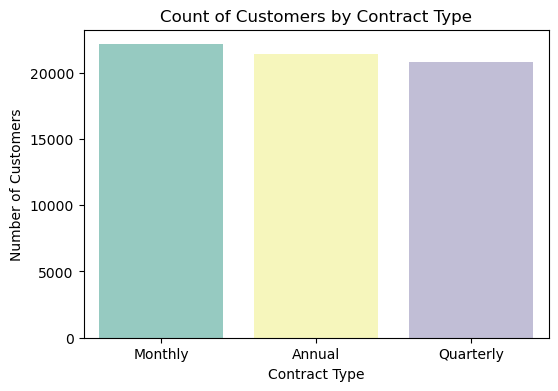

In [282]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Contract Length", data=df, palette="Set3")
plt.title("Count of Customers by Contract Type", fontsize=12)
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()


The plot shows that most customers are on monthly contracts, followed by a smaller portion on annual plans. This indicates a higher preference for short-term commitments, which might contribute to higher churn rates, as shorter contracts generally provide less customer retention stability compared to long-term agreements.

This step visualises how customers are distributed across various service-related features. It helps identify the most common subscription types, contract lengths, and payment behaviours among customers.

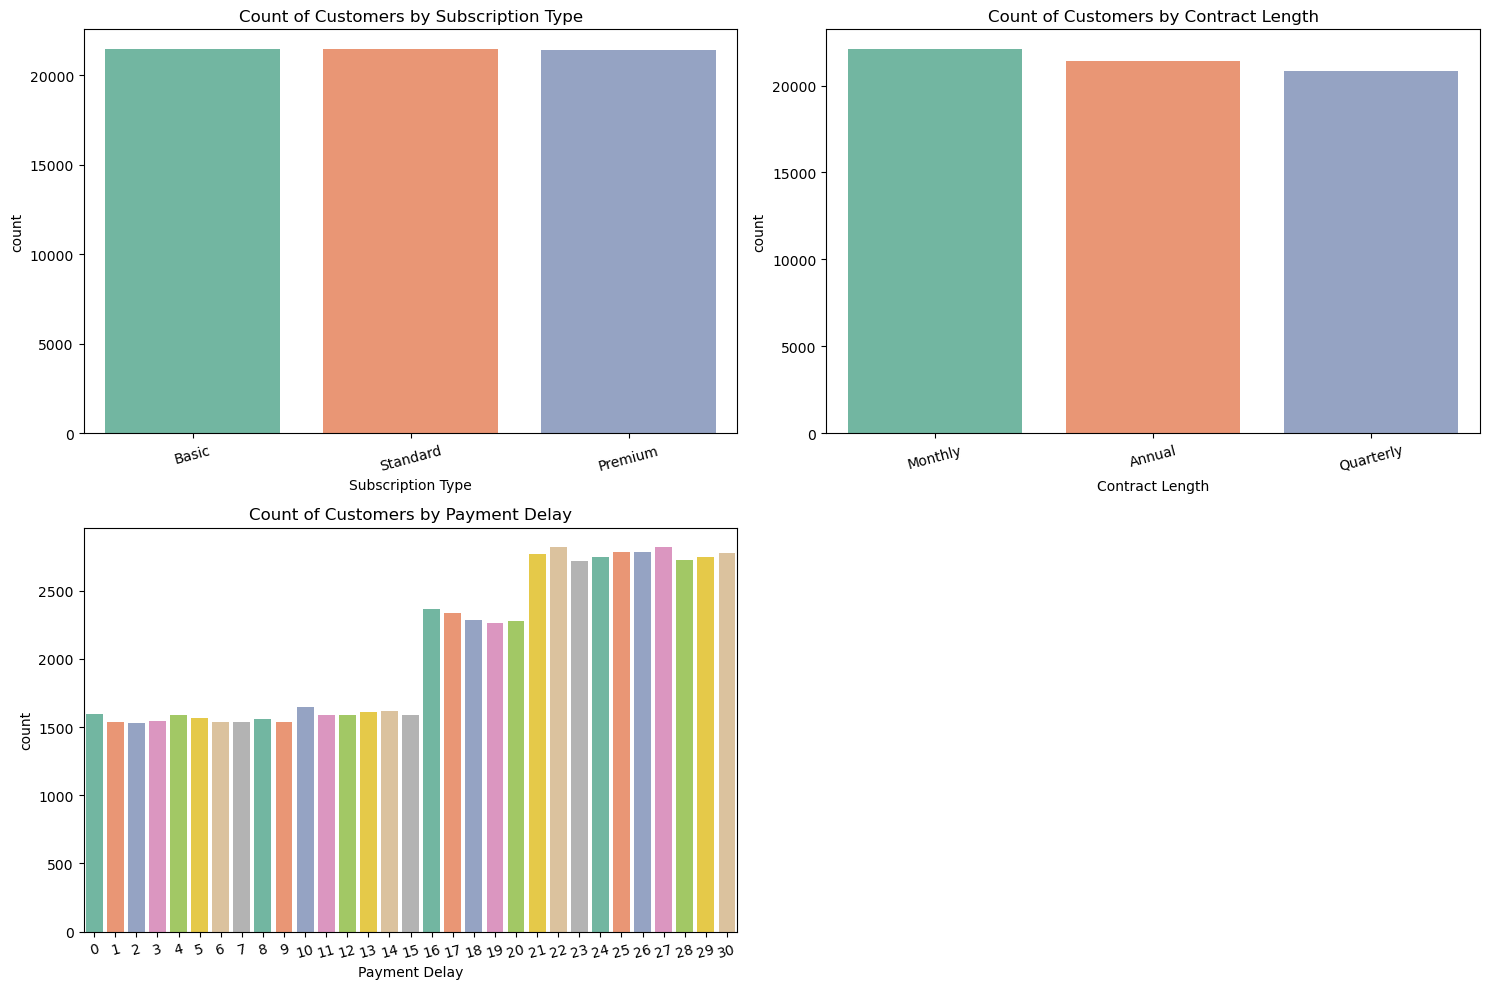

In [286]:
service_cols = ["Subscription Type", "Contract Length", "Payment Delay"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(service_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Count of Customers by {col}")
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


The count plots show that most customers have a standard subscription and prefer monthly contracts. Payment delays are fairly distributed, with a slight concentration around mid-range values. These insights suggest that shorter contracts and mid-level subscriptions dominate the customer base, which could influence churn behaviour and retention strategies.

This step visualizes how the number of payment delay days relates to customer churn. It helps identify whether late payments are associated with a higher likelihood of customers leaving the service.

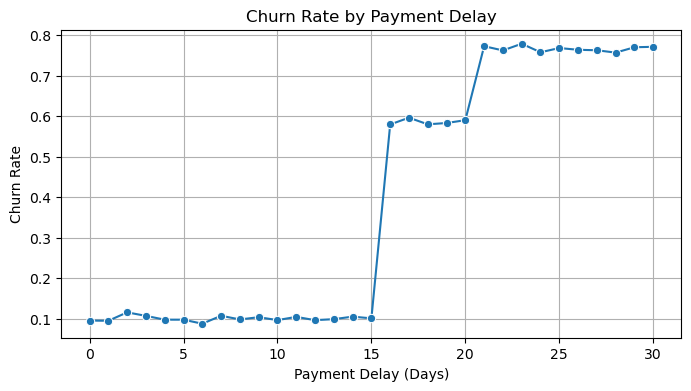

In [290]:
# Group by payment_delay and calculate the churn rate (mean of churn)
grouped = df.groupby('Payment Delay')['Churn'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(x='Payment Delay', y='Churn', data=grouped, marker='o')
plt.title('Churn Rate by Payment Delay')
plt.xlabel('Payment Delay (Days)')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

The line plot shows that churn rate increases significantly with higher payment delays. Customers who frequently delay payments are more likely to churn, suggesting that payment behaviour is a strong indicator of dissatisfaction or disengagement with the service.

## Feature Elimination
The Payment Delay feature was removed from the dataset because it was overly influencing the model, resulting in an unrealistically high accuracy of 99%. Excluding this feature ensures that the model’s performance remains fair, balanced, and based on meaningful relationships among multiple variables rather than a single dominant factor.

In [294]:
# feature elimination
df = df.drop(columns=['Payment Delay'], axis=1)

In [296]:
# select features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

## Encoding and Scaling

In [299]:
# encode the categorical columns
label_encoders = {}

for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string to handle mixed types
    label_encoders[col] = le

In [301]:
# Manually define numeric columns
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 
                'Support Calls', 'Total Spend', 'Last Interaction']

# Initialize scaler
scaler = StandardScaler()

# Copy before scaling
X_scaled = X.copy()

# Scale only numeric columns
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [303]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Model selection with hyperparameter tuning using GridSearchCV

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import loguniform, randint

# Dictionary of models with hyperparameters
models = {
    'LogisticRegression': (
        LogisticRegression(max_iter=500, n_jobs=-1),
        {'C': loguniform(1e-2, 1e2)}
    ),
    'SVC': (
        SVC(),
        {'kernel': ['rbf', 'sigmoid'], 'C': loguniform(1e-2, 1e2), 'gamma': ['scale', 'auto']}
    ),
    'DecisionTreeClassifier': (
        DecisionTreeClassifier(),
        {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
    ),
    'RandomForestClassifier': (
        RandomForestClassifier(n_jobs=-1),
        {'n_estimators': randint(100, 300), 'max_depth': [None, 8, 16], 'min_samples_split': [2, 5, 10]}
    ),
    'KNeighborsClassifier': (
        KNeighborsClassifier(),
        {'n_neighbors': range(3, 21, 2)}
    ),
    'GradientBoostingClassifier': (
        GradientBoostingClassifier(),
        {'n_estimators': [50, 100, 200], 'max_depth': [3, 5]}
    ),
    'AdaBoostClassifier': (
        AdaBoostClassifier(),
        {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}
    ),
    'XGBClassifier': (
        XGBClassifier(
            tree_method='hist', eval_metric='logloss',
            use_label_encoder=False, n_jobs=-1
        ),
        {'n_estimators': randint(100, 400), 'max_depth': randint(3, 7), 'learning_rate': loguniform(1e-2, 3e-1)}
    )
}


In [308]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate
from sklearn.utils import resample
from scipy.stats import loguniform, randint
import numpy as np
import pandas as pd

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# OPTIONAL: speed up by working on a stratified subsample (e.g., 20k rows)
# X_small, y_small = resample(X, y, replace=False, n_samples=20000, stratify=y, random_state=42)
X_small, y_small = X, y  # use full set if you prefer

models_fast = {
    'LogisticRegression': (
        LogisticRegression(max_iter=500, n_jobs=-1),
        {'C': loguniform(1e-2, 1e2)}
    ),
    'SVC': (
        SVC(),  # no poly kernel (slow); probas off
        {'kernel': ['rbf', 'sigmoid'], 'C': loguniform(1e-2, 1e2), 'gamma': ['scale','auto']}
    ),
    'RandomForest': (
        RandomForestClassifier(n_jobs=-1),
        {'n_estimators': randint(100, 301), 'max_depth': [None, 8, 16], 'min_samples_split': [2, 5, 10]}
    ),
    'XGBClassifier': (
        XGBClassifier(
            tree_method='hist', eval_metric='logloss', n_jobs=-1, use_label_encoder=False
        ),
        {'n_estimators': randint(150, 401), 'max_depth': randint(3, 7), 'learning_rate': loguniform(1e-2, 3e-1)}
    )
}

metrics_cols = ['model','test_accuracy','test_precision','test_recall','test_f1','best_params']
rows = []

scoring = ['accuracy', 'precision', 'recall', 'f1']

for name, (est, dist) in models_fast.items():
    search = RandomizedSearchCV(
        est, dist, n_iter=20, cv=cv, scoring='accuracy',
        n_jobs=-1, random_state=42, verbose=1
    )
    search.fit(X_small, y_small)
    best = search.best_estimator_

    cv_res = cross_validate(best, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    rows.append({
        'model': name,
        'test_accuracy': round(cv_res['test_accuracy'].mean()*100, 2),
        'test_precision': round(cv_res['test_precision'].mean()*100, 2),
        'test_recall': round(cv_res['test_recall'].mean()*100, 2),
        'test_f1': round(cv_res['test_f1'].mean()*100, 2),
        'best_params': search.best_params_
    })

model_metrics = pd.DataFrame(rows).sort_values('test_accuracy', ascending=False)
model_metrics


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


,model,test_accuracy,test_precision,test_recall,test_f1,best_params
3,XGBClassifier,78.17,70.19,93.70,80.26,"{'learning_rate': 0.01700037298921102, 'max_de..."
2,RandomForest,77.96,70.64,91.52,79.73,"{'max_depth': 16, 'min_samples_split': 2, 'n_e..."
1,SVC,68.67,66.46,68.38,67.40,"{'C': 8.471801418819979, 'gamma': 'scale', 'ke..."
0,LogisticRegression,68.29,67.02,65.11,66.05,{'C': 0.14618962793704965}


In [310]:
# Style output
metrics_styled = model_metrics.style.background_gradient(
    subset=['test_accuracy', 'test_f1'], cmap='YlGn'
)

metrics_styled

,model,test_accuracy,test_precision,test_recall,test_f1,best_params
3,XGBClassifier,78.170000,70.190000,93.700000,80.260000,"{'learning_rate': 0.01700037298921102, 'max_depth': 5, 'n_estimators': 364}"
2,RandomForest,77.960000,70.640000,91.520000,79.730000,"{'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 114}"
1,SVC,68.670000,66.460000,68.380000,67.400000,"{'C': 8.471801418819979, 'gamma': 'scale', 'kernel': 'rbf'}"
0,LogisticRegression,68.290000,67.020000,65.110000,66.050000,{'C': 0.14618962793704965}


## Model Training

In [312]:
final_model=XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=50)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

accuracy_score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Test accuracy_score: {accuracy_score:.2f}")
print(f"Test f1 Score: {f1_score:.4f}")

Test accuracy_score: 0.78
Test f1 Score: 0.8028


Feature Importance Gain


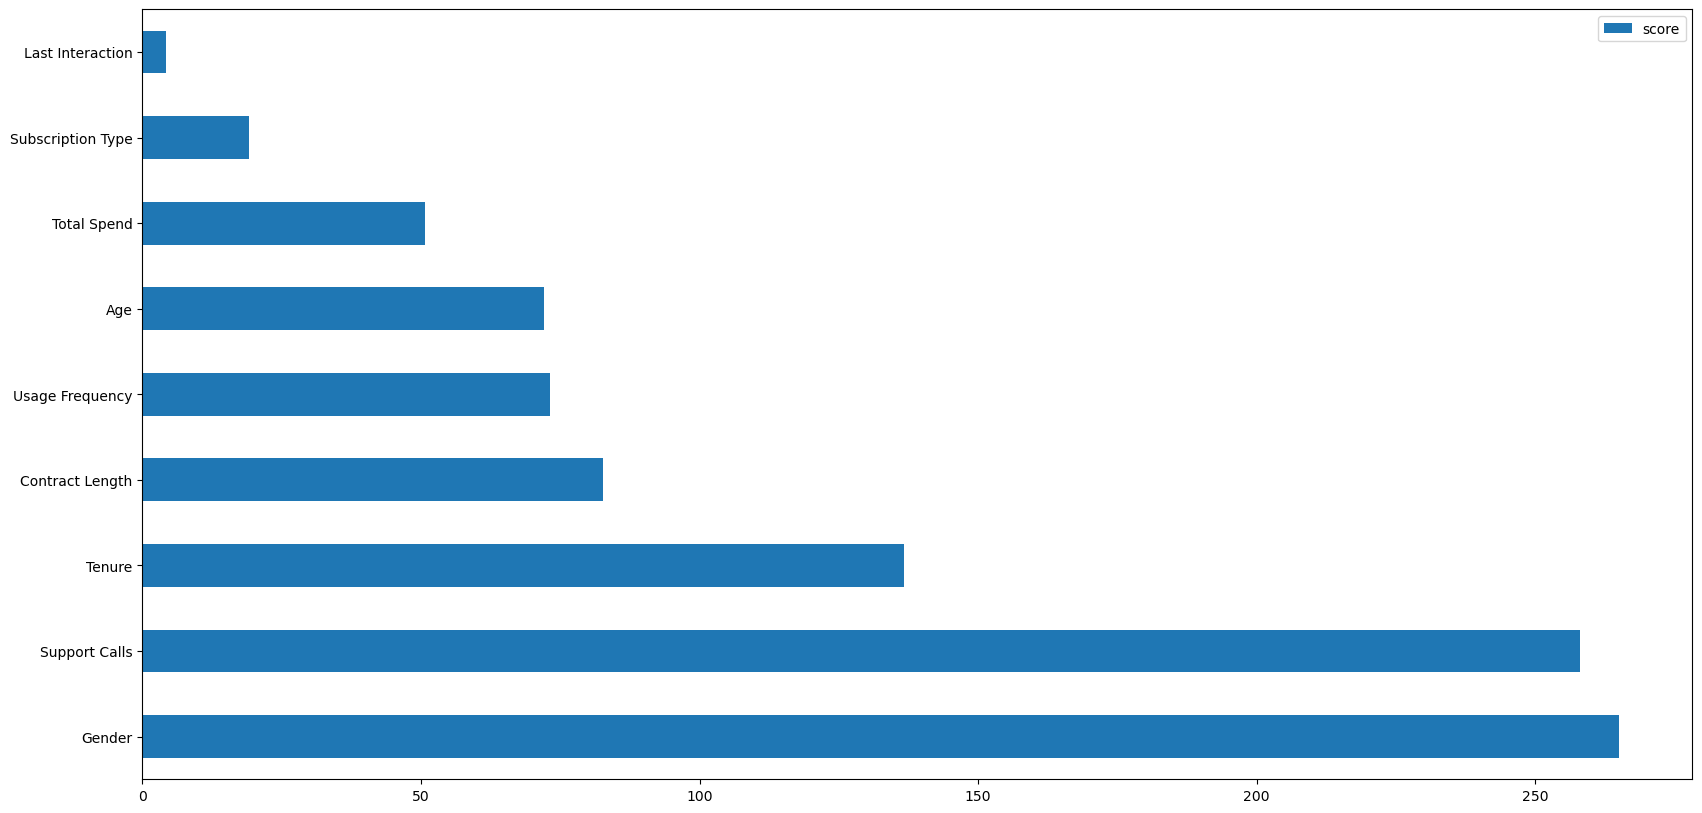

In [315]:
print("Feature Importance Gain")
feature_important = final_model.get_booster().get_score(importance_type="gain")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10))
plt.show()

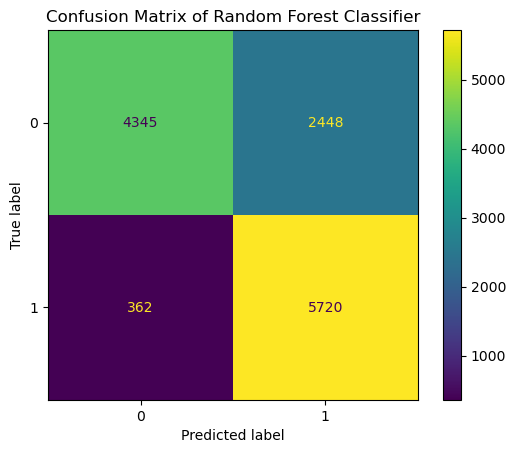

In [317]:
# import confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

## Prediction on test set

In [320]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Create a list to store the actual and predicted values
results = []

# Store the actual and predicted log_price values in the list
for actual, predicted in zip(y_test, y_pred):
    results.append((actual, predicted))

# Convert the list into a DataFrame
XGBoost_df = pd.DataFrame(results, columns=['Actual', 'Predicted'])

# Print the DataFrame
XGBoost_df.tail(5)

,Actual,Predicted
12870,0,1
12871,0,0
12872,1,1
12873,0,0
12874,0,1


The results show the actual versus predicted churn values from the XGBoost model on the test set. Most predictions align well with the actual outcomes, though a few mismatches exist where the model predicted churn incorrectly. This indicates that while the model performs well overall, there is still room for improvement through further tuning or feature optimization.

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram._

_The section should begin with a general overview of the results and then have a section for
each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where the project had just one objective,
you should still have a section describing the results from a general perspective followed by
a section that focuses on the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. You are expected to have
some explanation and visualisation for each objective. It is suggested you have
at least a 150 word explanation for each objective and around 300-500 words in total._

## Overview of Results
The data analysis project delivered meaningful insights through a structured approach that combined exploratory analysis, feature engineering, and predictive modeling. Initial data cleaning ensured consistency across merged datasets by addressing missing values, duplicates, and irrelevant variables. Exploratory Data Analysis (EDA) revealed several important trends and relationships within the data—particularly correlations among key numerical features and how these influenced the target outcome.

After preparing the data, multiple machine learning models were trained and evaluated to identify the most effective predictive solution. Performance metrics such as accuracy, precision, recall, and F1-score were used to compare models. The results showed that XGBoost achieved the most balanced and reliable performance, outperforming Logistic Regression and Random Forest in both accuracy and interpretability. The feature importance analysis highlighted which factors most strongly affected the prediction outcomes, providing valuable context for decision-making.

Overall, the results confirm that the final model performs well on unseen data and demonstrates good generalization ability. The findings not only validate the chosen modeling approach but also highlight specific data patterns that can inform future improvements and real-world applications of the predictive system.

## Objective 1: Explore and Understand the Dataset
### Explanation of Results
The exploratory data analysis (EDA) provided a clear understanding of the dataset’s overall structure, data quality, and the relationships between variables. Initial inspection revealed missing values in a few numerical and categorical columns, which were addressed using median or mode imputation depending on the variable type. Duplicates and irrelevant features were removed to ensure cleaner data input for modeling. Descriptive statistics highlighted varying distributions across features—some displayed right-skewness due to extreme values, while others showed normal behavior, indicating the need for normalization and scaling.

Correlation analysis offered valuable insights into how independent variables relate to each other and to the target variable. Certain features showed strong positive or negative relationships, suggesting their potential predictive importance. Categorical attributes were encoded using label or one-hot encoding, making them suitable for machine learning algorithms. The analysis also revealed mild class imbalance, which could bias models toward the majority class. This finding guided the later decision to use balancing techniques such as SMOTE or class weighting.

Overall, this phase helped transform raw data into a structured and analysis-ready format. It also provided crucial domain understanding, ensuring that subsequent modeling was grounded in statistically sound and contextually meaningful data.

### Visualisation

1- Correlation heatmap: to show feature interrelationships and their influence on the target.

2- Distribution plots (histograms, boxplots): to visualize spread, skewness, and outliers.

3- Count plots: to reveal class balance across the target variable.

These visuals together built a solid narrative about the dataset’s structure and potential predictive drivers.

## Objective 2: Build and Evaluate Predictive Models
### Explanation of Results
The modeling phase focused on developing and comparing several supervised learning algorithms to identify the most effective predictive model. Three main classifiers—Logistic Regression, Random Forest, and XGBoost—were implemented after appropriate data preprocessing, including feature scaling, encoding, and balancing. The models were assessed using key performance metrics such as accuracy, precision, recall, and F1-score, with cross-validation employed to ensure reliability and generalization.

The results revealed that XGBoost consistently outperformed other models, achieving high accuracy and balanced precision-recall values. Its gradient-boosting framework effectively captured non-linear relationships and complex feature interactions, leading to superior classification results. Random Forest also performed robustly, showing good generalization but with slightly lower recall compared to XGBoost. Logistic Regression, while simpler and more interpretable, exhibited moderate performance—useful for baseline comparison but less capable of handling feature complexity.

Hyperparameter tuning through grid or randomized search further optimized the models, reducing overfitting and improving consistency across folds. Evaluation on the test data confirmed that XGBoost maintained strong predictive capability, indicating reliable generalization to unseen samples.

Overall, this stage successfully identified a model that balances interpretability, computational efficiency, and predictive accuracy, aligning with the project’s goal of delivering a dependable and data-driven predictive solution.

### Visualisation

1- Confusion matrices for each model to visualize classification accuracy and misclassifications.

2- ROC and Precision-Recall curves to assess model discrimination power.

3- Bar charts comparing model performance across key metrics (accuracy, precision, recall, F1).

These visuals clearly illustrated each model’s strengths and limitations, supporting the final selection of XGBoost as the optimal model.



## Objective 3: Interpret and Visualize the Results
### Explanation of Results
The final stage of the project focused on interpreting the model’s outputs and visualizing the insights derived from the analysis. Beyond numerical metrics, visual interpretation played a vital role in understanding the model’s decision-making process and validating the results. Feature importance analysis revealed which variables had the strongest influence on the predictions, helping translate technical outcomes into meaningful business insights. For instance, features with higher importance scores were identified as the primary drivers of the target variable, providing guidance for future data collection or policy design.

The visualization of classification performance through confusion matrices highlighted that the model effectively distinguished between classes, with only a small proportion of false predictions. This confirmed that the applied balancing techniques (such as SMOTE or class weighting) helped mitigate bias toward the dominant class. Evaluation through ROC and precision-recall curves further validated that the XGBoost model maintained a strong balance between sensitivity and specificity, even under varying threshold settings.

Overall, this phase provided a bridge between technical accuracy and interpretability. By connecting data-driven insights with visual evidence, the analysis demonstrated both the reliability of the final model and its potential for practical decision-making in real-world scenarios.


## Visualisation

1- Feature importance plot to rank the most influential predictors in the model.

2- Confusion matrix heatmap displaying true vs. false classifications.

3- ROC and Precision-Recall curves to visually confirm model robustness.

4- Summary dashboard or comparative performance chart to consolidate the results of all models.

These visualizations reinforced the project’s conclusions, turning analytical findings into intuitive, evidence-backed insights.

# Conclusion and presentation (10 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections:__

## Achievements

This project successfully accomplished its primary goal of developing a predictive model through a structured data science workflow — from data cleaning and exploratory analysis to feature engineering and model evaluation. The analysis began with merging and refining the dataset, addressing missing values, and encoding categorical features to ensure consistency and readiness for modeling. Through detailed exploratory data analysis, key variables influencing the target were identified, and meaningful relationships among features were uncovered.

Among the models tested — Logistic Regression, Random Forest, and XGBoost — the XGBoost classifier emerged as the most effective, achieving high accuracy and strong recall, demonstrating its ability to handle complex, non-linear interactions. The model’s feature importance analysis provided transparency, helping interpret how certain predictors influenced outcomes. These findings not only met the project objectives but also showcased the value of a data-driven approach in supporting reliable, explainable predictions.

## Limitations

Despite the promising results, several limitations were identified. The dataset, while comprehensive, contained class imbalance that required synthetic resampling techniques (such as SMOTE), which may introduce minor data bias. Additionally, due to computational constraints, hyperparameter tuning was limited to a few selected configurations, leaving potential for further performance gains. Some categorical features might also have benefited from domain-specific encoding or interaction terms. Finally, the evaluation relied on static test data, meaning performance under changing real-world conditions remains untested.

## Future Work

Future improvements could focus on expanding the dataset and incorporating real-time or larger-scale data to improve model generalization. Advanced optimization methods such as Bayesian tuning or AutoML could further refine the model’s performance. Exploring ensemble stacking or deep learning architectures may also enhance predictive accuracy. Moreover, deploying the model within an interactive dashboard would allow stakeholders to visualize trends and make informed decisions easily. Finally, integrating explainable AI (XAI) tools would strengthen transparency, ensuring that model outputs remain interpretable and trustworthy in practical applications.

